In [2]:
!pip install scikit-learn

In [3]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd

In [4]:
print(sklearn.__version__)

1.6.0


In [5]:
iris = load_iris(as_frame=True)
df = iris.data
df['target'] = iris.target

df.sample(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
2,4.7,3.2,1.3,0.2,0
127,6.1,3.0,4.9,1.8,2
133,6.3,2.8,5.1,1.5,2
86,6.7,3.1,4.7,1.5,1
54,6.5,2.8,4.6,1.5,1
129,7.2,3.0,5.8,1.6,2
33,5.5,4.2,1.4,0.2,0
136,6.3,3.4,5.6,2.4,2
29,4.7,3.2,1.6,0.2,0
44,5.1,3.8,1.9,0.4,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Пронаблюдаем выбросы

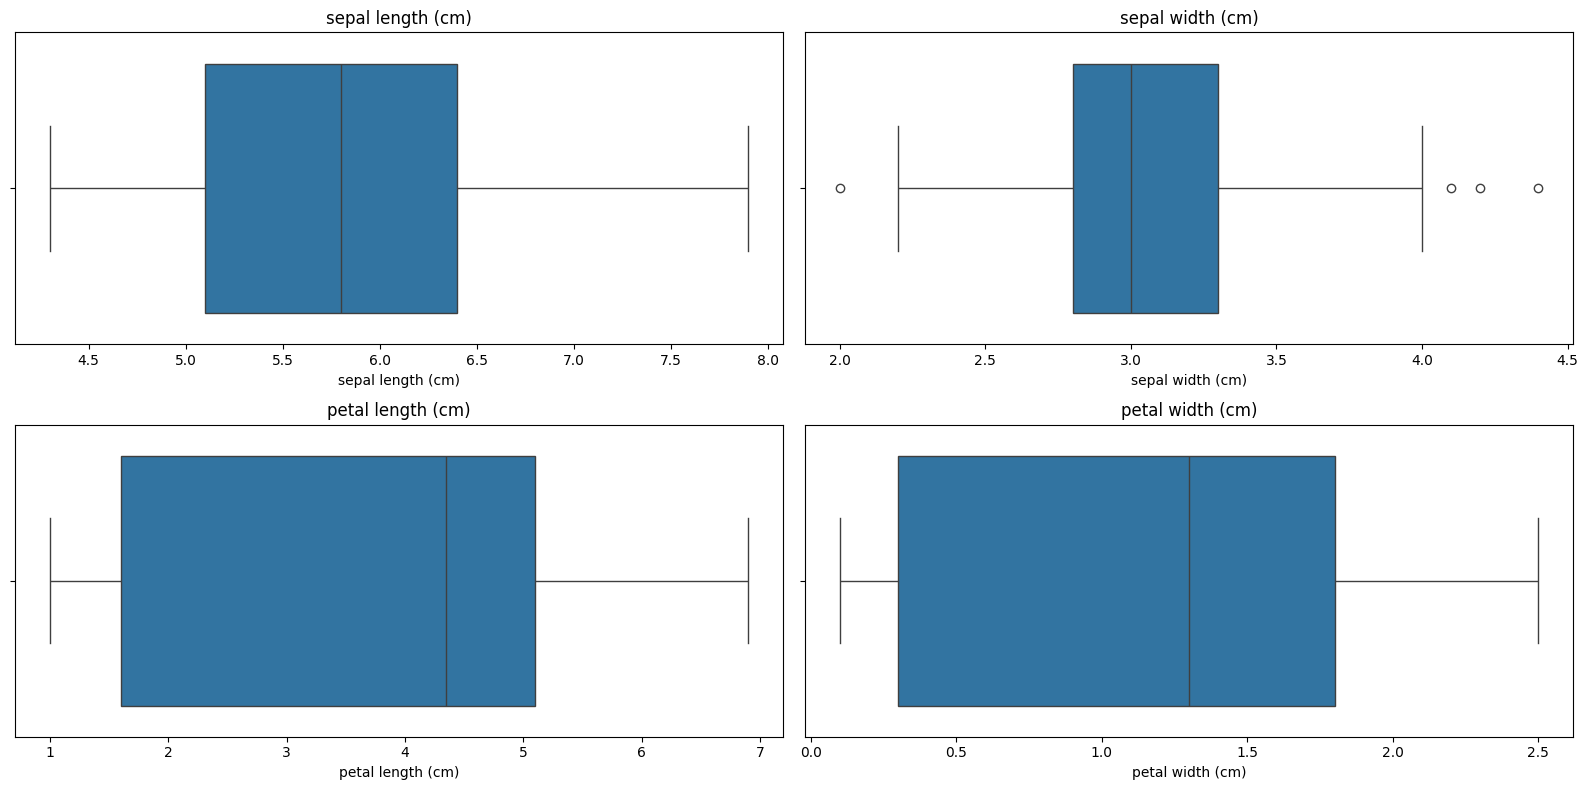

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
axes = axes.flatten()

for i in range(4):
    sns.boxplot(x=df.iloc[:, i], ax=axes[i])
    axes[i].set_title(f"{df.columns[i]}")

plt.tight_layout()
plt.show()

Выбросов нет! Просто проведем мантру по борьбе с выбросами!

In [9]:
from scipy import stats

threshold = 3

for name,column in df.iloc[:,:4].items():
    z_scores = stats.zscore(column)
    median_value = column.median()
    df.loc[abs(z_scores) > threshold, name] = median_value

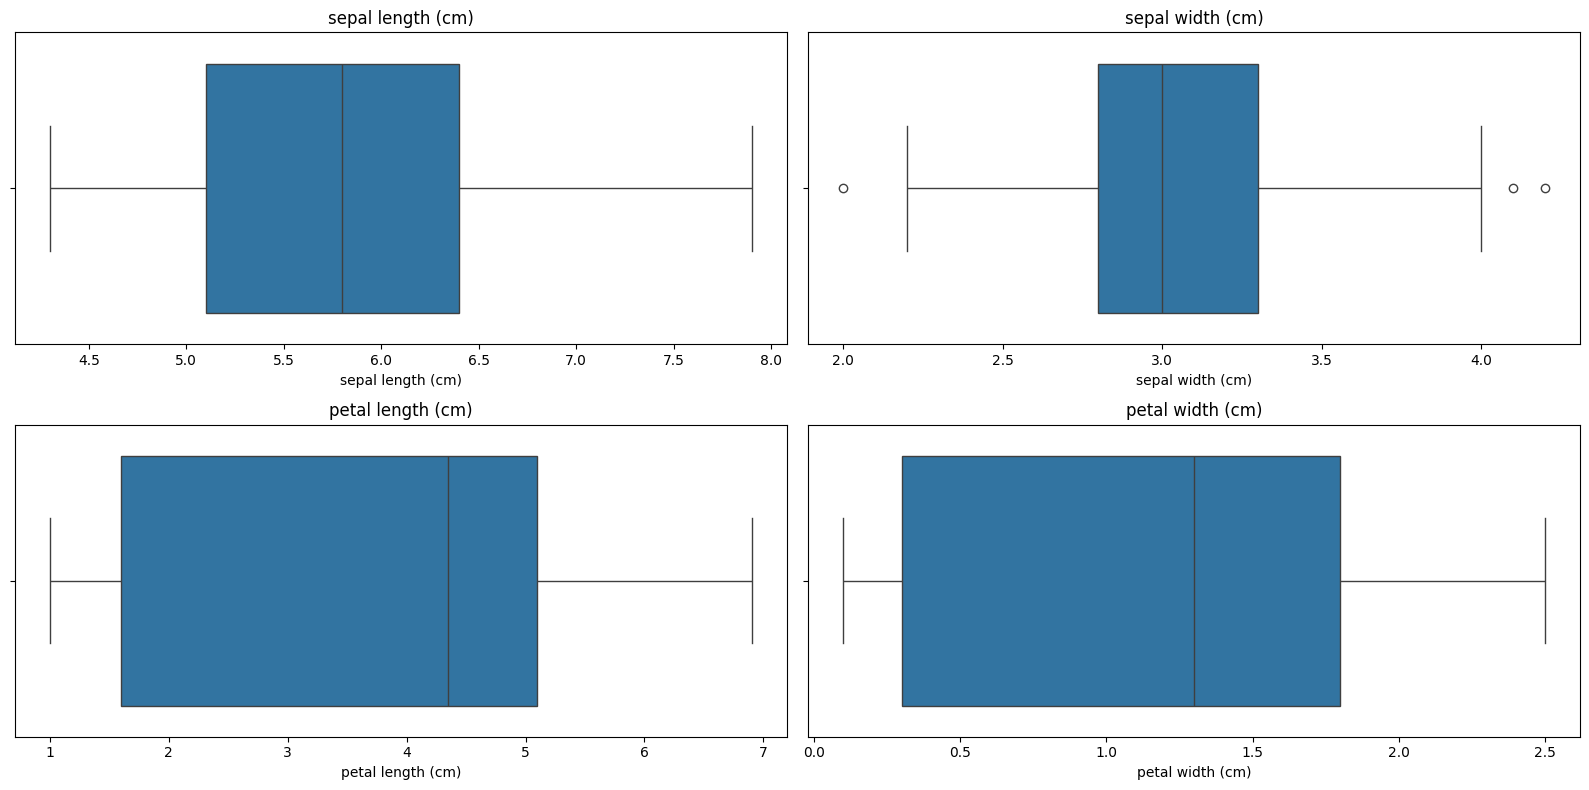

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
axes = axes.flatten()

for i in range(4):
    sns.boxplot(x=df.iloc[:, i], ax=axes[i])
    axes[i].set_title(f"{df.columns[i]}")

plt.tight_layout()
plt.show()

Провели. Делим дату на куски!

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4], df['target'], test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
min_max_scaler=MinMaxScaler()

#эти данные стандартизируем
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

#эти - нормализируем
X_train_n = min_max_scaler.fit_transform(X_train)
X_test_n = min_max_scaler.transform(X_test)

print(X_train.head())

X_train_n_df = pd.DataFrame(X_train_n, columns=X_train.columns)
X_train_s_df = pd.DataFrame(X_train_s, columns=X_train.columns)

print(X_train_n_df.head())
print(X_train_s_df.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               3.0                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.088235          0.727273           0.000000          0.041667
1           0.411765          0.454545           0.087719          0.125000
2           0.705882          0.500000           0.596491          0.541667
3           0.147059          0.636364           0.105263          0.041667
4           0.029412          0.545455           0.052632          0.041667
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0     

In [15]:
from sklearn.linear_model import LogisticRegression
# Логистическая регрессия без регуляризации
model_no_reg = LogisticRegression(C=1e10, penalty='l2')
model_no_reg.fit(X_train, y_train)
print("Логистическая регрессия 'пустая'. Данные не масштабированы")
test=model_no_reg.predict(X_test)
print(accuracy_score(y_test,test))

model_no_reg_n = LogisticRegression(C=1e10, penalty='l2')
model_no_reg_n.fit(X_train_n, y_train)
print("Логистическая регрессия 'пустая'. Данные нормализованы")
test=model_no_reg_n.predict(X_test_n)
print(accuracy_score(y_test,test))

model_no_reg_s = LogisticRegression(C=1e10, penalty='l2')
model_no_reg_s.fit(X_train_s, y_train)
print("Логистическая регрессия 'пустая'. Данные стандартизованы")
test=model_no_reg_s.predict(X_test_s)
print(accuracy_score(y_test,test))

Логистическая регрессия 'пустая'. Данные не масштабированы
1.0
Логистическая регрессия 'пустая'. Данные нормализованы
1.0
Логистическая регрессия 'пустая'. Данные стандартизованы
1.0


In [16]:
# Логистическая регрессия с L2-регуляризацией (по умолчанию)
model_l2 = LogisticRegression(C=1.0)
model_l2.fit(X_train, y_train)
print("Логистическая регрессия L2. Данные не масштабированы")
test=model_l2.predict(X_test)
print(accuracy_score(y_test,test))

model_l2_n = LogisticRegression(C=1.0)
model_l2_n.fit(X_train_n, y_train)
print("Логистическая регрессия L2. Данные нормализованы")
test=model_l2_n.predict(X_test_n)
print(accuracy_score(y_test,test))

model_l2_s = LogisticRegression(C=1.0)
model_l2_s.fit(X_train_s, y_train)
print("Логистическая регрессия L2. Данные не стандартизованы")
test=model_l2_s.predict(X_test_s)
print(accuracy_score(y_test,test))

Логистическая регрессия L2. Данные не масштабированы
1.0
Логистическая регрессия L2. Данные нормализованы
0.9666666666666667
Логистическая регрессия L2. Данные не стандартизованы
1.0


In [19]:
# Логистическая регрессия с L1-регуляризацией
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X_train, y_train)
print("Логистическая регрессия L1. Данные не масштабированы")
test=model_l1.predict(X_test)
print(accuracy_score(y_test,test))

model_l1_n = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1_n.fit(X_train_n, y_train)
print("Логистическая регрессия L1. Данные нормализованы")
test=model_l1_n.predict(X_test_n)
print(accuracy_score(y_test,test))

model_l1_s = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1_s.fit(X_train_s, y_train)
print("Логистическая регрессия L1. Данные не стандартизованы")
test=model_l1_s.predict(X_test_s)
print(accuracy_score(y_test,test))
# test_df=pd.DataFrame({'value':y_test,'predict':test})
# test_df.sample(20)

Логистическая регрессия L1. Данные не масштабированы
1.0
Логистическая регрессия L1. Данные нормализованы
0.9666666666666667
Логистическая регрессия L1. Данные не стандартизованы
0.9666666666666667


,value,predict
18,0,0
73,1,1
55,1,1
78,1,1
68,1,1
56,1,2
132,2,2
145,2,2
12,0,0
30,0,0


In [22]:
print("Без регуляризации:", model_no_reg_s.score(X_test_s, y_test))
print("С L2-регуляризацией:", model_l2_s.score(X_test_s, y_test))
print("С L1-регуляризацией:", model_l1_s.score(X_test_s, y_test))

Без регуляризации: 1.0
С L2-регуляризацией: 1.0
С L1-регуляризацией: 0.9666666666666667


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Grid Search с кросс-валидацией
grid_search = GridSearchCV(estimator=model_l1_s, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_s, y_train)

# Результаты
print("Лучшее значение C для L1:", grid_search.best_params_['C'])
print("Лучший результат на кросс-валидации для L1:", grid_search.best_score_)


# Grid Search с кросс-валидацией
grid_search = GridSearchCV(estimator=model_l2_s, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_s, y_train)

# Результаты
print("Лучшее значение C для L2:", grid_search.best_params_['C'])
print("Лучший результат на кросс-валидации для L2:", grid_search.best_score_)


Лучшее значение C для L1: 10
Лучший результат на кросс-валидации для L1: 0.9583333333333334
Лучшее значение C для L2: 1
Лучший результат на кросс-валидации для L2: 0.9583333333333334


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Lo

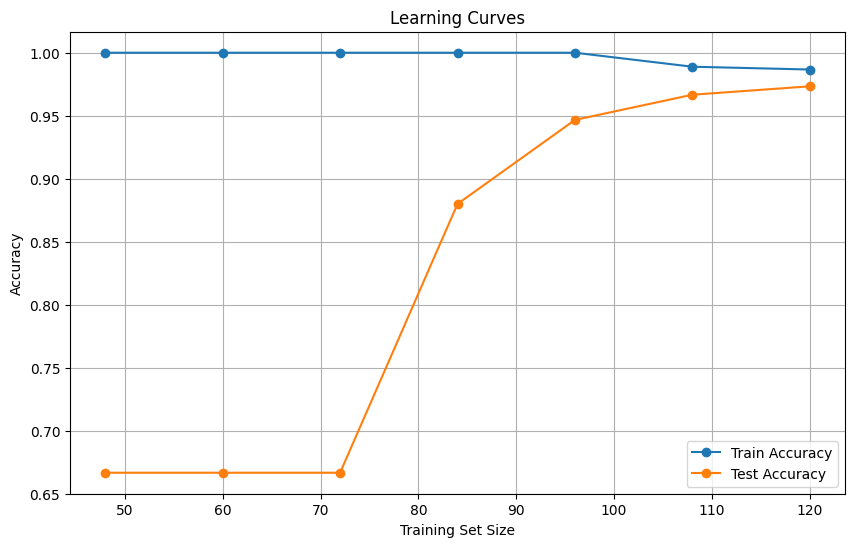

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model_no_reg_s, df.iloc[:,:4], df['target'], train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
)

# Усредняем результаты по кросс-валидации
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train Accuracy', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test Accuracy', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Lo

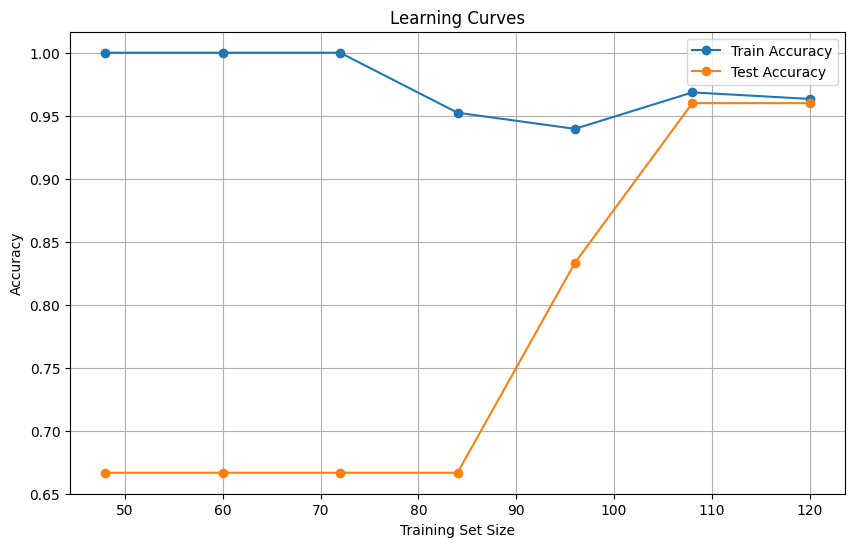

In [26]:
train_sizes, train_scores, test_scores = learning_curve(
    model_l1_s, df.iloc[:,:4], df['target'], train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
)

# Усредняем результаты по кросс-валидации
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train Accuracy', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test Accuracy', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

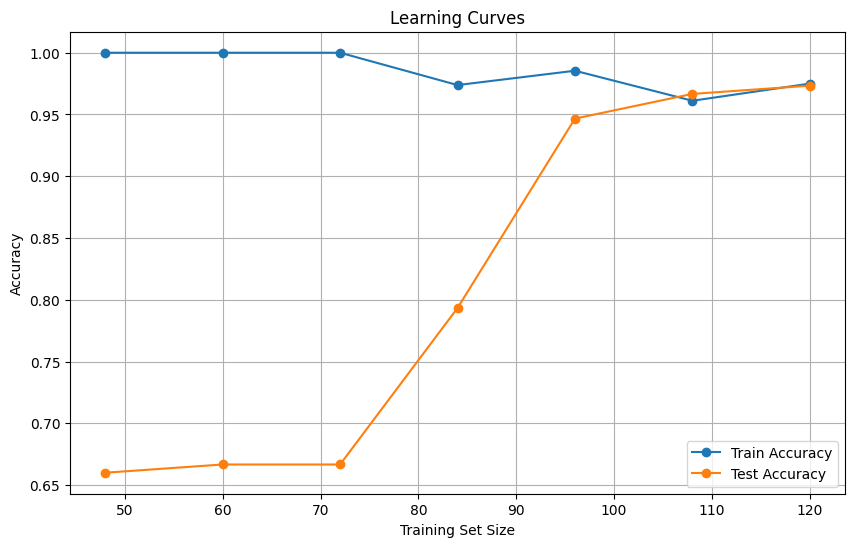

In [27]:
train_sizes, train_scores, test_scores = learning_curve(
    model_l2_s, df.iloc[:,:4], df['target'], train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
)

# Усредняем результаты по кросс-валидации
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train Accuracy', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test Accuracy', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()


Отчет: провели изучение логистической регрессии с учетом ее свойства - регуляризации, которое упрощая модель предотвращает ее переобучение и повышает способность к обобщению!
Проблема данного иследования кроется в очень малом наборе данных! С этим связано отсутствие всякой разницы между моделью с регуляризацией и без нее! Мной обнаружена только некоторая тенденция, которая лишь прослеживается на графиках обучения моделей. Для сравнения были взяты модели со стандартизацией данных (к слову, на данном датасете не удалось установить влияния масштабирования данных на качество модели). На графиках обучения моделей без регуляризации, с регуляризацией L1 и L2 видно, что аккуратность попадания растет с ростом размера набора данных как в тренеровочном так и в тестовом наборе, при достижении  90 и более данных в наборе аккуратность становиться выше 95%, при этом наблюдаем некоторое снижение аккуратности тренеровочного набора, что может, наряду со сходимостью тренеровочного графика с тестовым, судить про приобретение моделью свойств к обобщению. Наиболее полную сходимость наблюдаем в случае L2-модели, меньшую у L1 и практически отсутствие полного схождения у модели без регуляризации! Таким образом вывод - l2-модель лучше обобщает данные.